# Learning outcomes
1. Download online images
2. Read, display and save images
3. Operation (2) on videos
4. Resizing: interpolation methods: nearest neighbor, bilinear, cubic and Lanczos

# Setup

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
# Atleast Python 3.8
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

# precautionary measure
if not cv.useOptimized():
    cv.setUseOptimized(True)

print(f"OpenCV is using optimized code? {cv.useOptimized()}")

OpenCV is using optimized code? True


# Download images from online URL

In [7]:
#import os
#os.makedirs("./images")

In [8]:
from urllib.request import urlretrieve

url = "https://img.freepik.com/free-photo/tibumana-waterfall-bali-island-indonesia_335224-356.jpg?t=st=1720146904~exp=1720150504~hmac=981e70e05d5ec2125210c65c6fb2b0170b479822bace76a295b2e3341801546e&w=900"
urlretrieve(url, filename="images/waterfall.jpg")

('images/waterfall.jpg', <http.client.HTTPMessage at 0x27d3119a450>)

In [9]:
from utils import download_save_img

download_save_img(url, "images/waterfall.jpg")

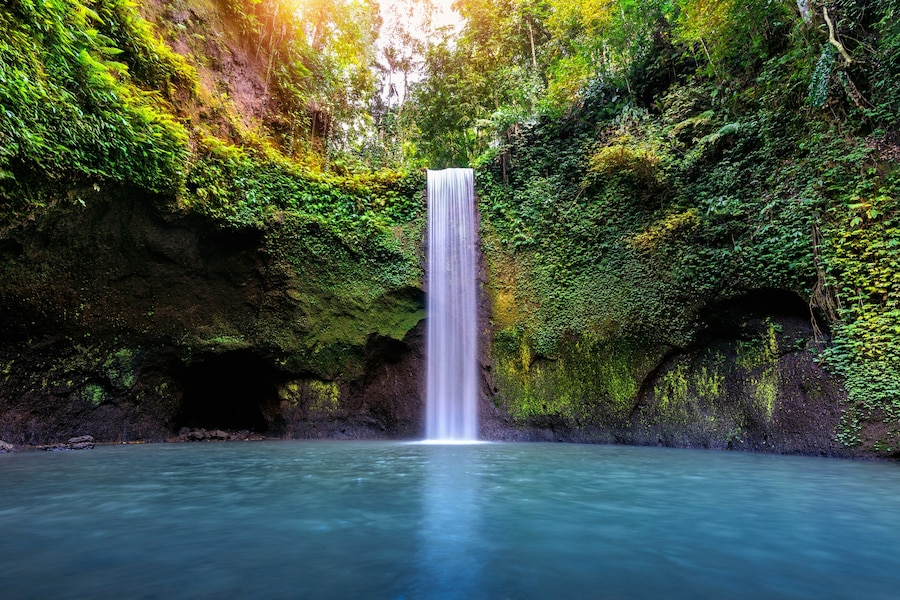

In [10]:
from IPython.display import Image
Image("images/waterfall.jpg")

# Read, display and save image

In [6]:
# JPEG AND png are the most widely used image extensions. But do you know the differences?
# img is a NumPy array object
img_jpeg = cv.imread("images/lena.jfif", cv.IMREAD_UNCHANGED)
img_png = cv.imread("images/lena.png", cv.IMREAD_UNCHANGED)

print("Shape of JPEG image: ", img_jpeg.shape)
print("Shape of pNG image: ", img_png.shape)

Shape of JPEG image:  (225, 225, 3)
Shape of pNG image:  (225, 225, 4)


## tiff image

In [7]:
img = cv.imread("images/lena.tif")

In [8]:
img.shape

(225, 225, 3)

## caveat in `cv.imread()`

In [10]:
img = cv.imread(cv.samples.findFile("images/waterfall.png")) # non-existent image

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\utils\samples.cpp:64: error: (-2:Unspecified error) OpenCV samples: Can't find required data file: images/waterfall.png in function 'cv::samples::findFile'


## GIF file (imageio)

In [12]:
!pip install imageio

   ---------------------------------------- 0.0/313.5 kB ? eta -:--:--
   ------------- -------------------------- 102.4/313.5 kB 5.8 MB/s eta 0:00:01
   ------------- -------------------------- 102.4/313.5 kB 5.8 MB/s eta 0:00:01
   ------------- -------------------------- 102.4/313.5 kB 5.8 MB/s eta 0:00:01
   ------------- -------------------------- 102.4/313.5 kB 5.8 MB/s eta 0:00:01
   ------------- -------------------------- 102.4/313.5 kB 5.8 MB/s eta 0:00:01
   ---------------- --------------------- 133.1/313.5 kB 462.0 kB/s eta 0:00:01
   ------------------------ ------------- 204.8/313.5 kB 621.6 kB/s eta 0:00:01
   ------------------------------------ - 297.0/313.5 kB 833.5 kB/s eta 0:00:01
   ------------------------------------ - 297.0/313.5 kB 833.5 kB/s eta 0:00:01
   ------------------------------------ - 297.0/313.5 kB 833.5 kB/s eta 0:00:01
   ------------------------------------ - 297.0/313.5 kB 833.5 kB/s eta 0:00:01
   ------------------------------------ - 297.0/3


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import imageio

In [14]:
gif = imageio.mimread("images/rotating_earth_large.gif")   # RGB

# RGB -> BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in gif]

for img in imgs:
    cv.imshow("gif", img) # new window appear
    cv.waitKey(100)   # wait for 100ms, then proceed with the next line of code

cv.destroyAllWindows()

In [2]:
img = cv.imread("images/lena.jfif")   # color image
img_grayscale = cv.imread("images/lena.png", 0) # grayscale image

cv.imshow("color", img)
cv.imshow("grayscale", img_grayscale)
cv.waitKey(0)   # wait for user action
cv.destroyAllWindows()

In [3]:
from utils import display_images

display_images([img, img_grayscale], ("color", "grayscale"))

## Read, display and save images

In [4]:
img = cv.imread("images/waterfall.jpg")

if img is None:
    sys.exit("The file path is not detected")

cv.imshow("nature", img)
k = cv.waitKey(0) & 0xFF  # waiting for user input
if k == ord("s"):
    cv.imwrite("waterfall.png", img)

cv.destroyAllWindows()

# Read, play and save video

In [3]:
cap = cv.VideoCapture(0)   # 2 options: filepath or 0 (webcam)

if not cap.isOpened():
    raise Exception("No video file detected")

# define a new save object, fourcc (identifier) width, height and fps
width = int(cap.get(3))   # width
height = int(cap.get(4))   # height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
out = cv.VideoWriter("video2.avi", fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()   # ret is status (boolean), frame is the image

    if not ret:
        print("No frame received")
        break

    # write / save frame
    out.write(frame)
    # show image
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow("frame", frame)

    k = cv.waitKey(1) & 0xFF
    if k == 27:   # "ascii code"
        break

cap.release()
out.release()
cv.destroyAllWindows()

# Resize images
1. Nearest neighbor
2. Bilinear
3. Bicubic
4. Lanczos interpolation

## 1st method: set arbitrary width and height
```
cv.resize(img, (w, h))
```

# 2nd method: set factors
```
cv.resize(img, None, fx=fx, fy=fy)
```

In [5]:
from utils import display_images

In [6]:
# 1st method
img = cv.imread("images/waterfall.jpg")
# print(img.shape)
# shrink the image
new_dim = (300, 200)
img_resize = cv.resize(img, new_dim, interpolation=cv.INTER_LINEAR)

display_images([img, img_resize], ("original", "resize"))

In [8]:
# 2nd way
img = cv.imread("images/waterfall.jpg")
# print(img.shape)
# shrink the image
# new_dim = (300, 200)
fx, fy = 0.9, 0.9
img_resize = cv.resize(img, None, fx=fx, fy=fy, interpolation=cv.INTER_LINEAR)

display_images([img, img_resize], ("original", "resize"))

In [23]:
# Load the image
img = cv.imread("images/dog.jfif")

# Save the image in PNG format
cv.imwrite("images/dog.png", img)

print(f'Image saved as {output_path}')

Image saved as dog.png


In [25]:
# Load the color image
color_img = cv.imread("images/gundam.png")

# Convert color image to grayscale
gray_img = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)

# Display both images using OpenCV's imshow
cv.namedWindow('Color and Grayscale Images', cv.WINDOW_NORMAL)
combined_img = cv.hconcat([color_img, cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)])
cv.imshow('Color and Grayscale Images', combined_img)

# Wait for any key press and then close all windows
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
import cv2 as cv

# Load the video
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    raise Exception("No video file detected")

# define a new save object, fourcc (identifier) width, height and fps
width = int(cap.get(3))   # width
height = int(cap.get(4))   # height

# Set new dimensions for the frames
new_width = width // 2
new_height = height // 2


fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
out = cv.VideoWriter("videos/Smaller Video", fourcc, fps, (new_width, new_height))

while cap.isOpened():
    ret, frame = cap.read()   # ret is status (boolean), frame is the image

    if not ret:
        print("No frame received")
        break

    # write / save frame
    out.write(frame)
    # show image
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow("frame", frame)

    k = cv.waitKey(1) & 0xFF
    if k == 27:   # "ascii code"
        break

cap.release()
out.release()
cv.destroyAllWindows()


No frame received


In [6]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ---------------- ---------------------- 71.7/165.9 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB 8.0 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/8.0 MB 7.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 6.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/8.0 MB 7.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 7.4 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.0 MB 7.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 7.3 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.0 MB 7.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/8.0 MB 7.7 MB/s eta 0:00:01
   ----------

In [7]:
import cv2 as cv
import numpy as np
import matplotlib as plt

# Load the image
image = cv.imread('images/dog.jfif')

if image is None:
    print("Error: Could not open or find the image.")
    exit()

# Define new dimensions
scale_factor = 2
new_width = int(image.shape[1] * scale_factor)
new_height = int(image.shape[0] * scale_factor)
new_dimensions = (new_width, new_height)

# Resize using different interpolation techniques
resized_linear = cv.resize(image, new_dimensions, interpolation=cv.INTER_LINEAR)
resized_cubic = cv.resize(image, new_dimensions, interpolation=cv.INTER_CUBIC)
resized_nearest = cv.resize(image, new_dimensions, interpolation=cv.INTER_NEAREST)

# Display the images
titles = ['Original Image', 'Linear Interpolation', 'Cubic Interpolation', 'Nearest Neighbor Interpolation']
images = [image, resized_linear, resized_cubic, resized_nearest]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplot'